NAMA : MUHAMMAD RIFQI ABIYYU ARIQ

NIM  : 09011381823114

SUPPORT VECTOR MACHINE

### Multiclass Classification Project
**Problem** -->

SVM adalah Binary Classifier dan di sini kita perlu melakukan multi class classification

**Solution** -->

kami memiliki dua pendekatan untuk menyelesaikan masalah klasifikasi
1. one vs one
2. one vs rest

kami tidak menggunakan one vs one metode di sini karena kami memiliki set data yang besar dan 
metode ini memiliki kompleksitas waktu O(N*2).

jadi, kita akan menggunakan one vs rest method.
        ![](multiclass.jpeg)


 


In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

###  Persiapan Set Data

In [166]:
from pathlib import Path
from keras.preprocessing import image

Di sini saya menggunakan kumpulan data anjing, kucing, kuda dan manusia
   ![](dog.jpeg)
   ![](humanandhorse.jpeg)
   ![](images.jpeg)

In [167]:
p = Path("/home/abheeshth/Desktop/images") # jalur ke folder gambar saya
dirs = p.glob("*")  # itu memberi kita objek generater sehingga kita dapat pengulangan di seluruh folder

labels_dict = {"cat":0,"dog":1,"horse":2,"human":3}

image_data = []
labels = []


for folder_dir in dirs:
    print(folder_dir)
    label = str(folder_dir).split("/")[-1][:-1] # mengekstrak label dari jalur
    print(label)
    
    for img_path in folder_dir.glob("*.jpg"): # mengulang semua gambar
        # img = image.load_img(img_path.target_size = (100.100)) # itu adalah gambar dengan fitur lengkapnya
        img = image.load_img(img_path,target_size = (32,32)) # ukuran target pada dasarnya menyesuaikan fitur gambar
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])

/home/abheeshth/Desktop/images/humans
human
/home/abheeshth/Desktop/images/cats
cat
/home/abheeshth/Desktop/images/dogs
dog
/home/abheeshth/Desktop/images/horses
horse


In [168]:
print(len(image_data))
print(len(labels))
print(labels)

808
808
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [169]:
# konversikan ini menjadi array numpy
image_data = np.array(image_data,dtype = 'float32')/255.0 # we write a condition on if image size is not lying in range(0,255)
labels = np.array(labels)

print(image_data.shape,labels.shape)

(808, 32, 32, 3) (808,)


### Menshuffle data secara acak

In [170]:
# kami melakukan beberapa shuffling acak dalam data kami untuk menghindari segala jenis overfitting
import random
combined = list(zip(image_data,labels)) 
# zip --> kami tidak ingin image_data dan label keduanya diacak dengan cara yang berbeda, itu dapat mengganggu pemetaan kami 
random.shuffle(combined)


#unzip
image_data[:],labels[:] = zip(*combined)

### memvisualisasikan data

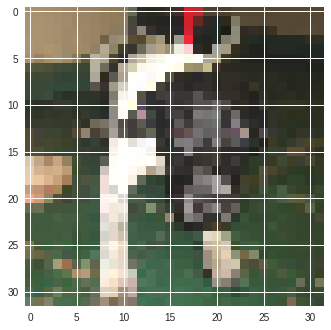

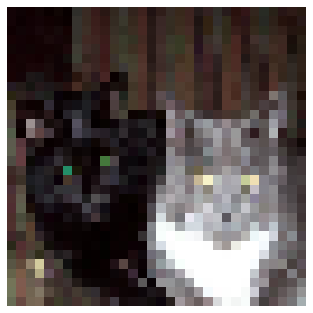

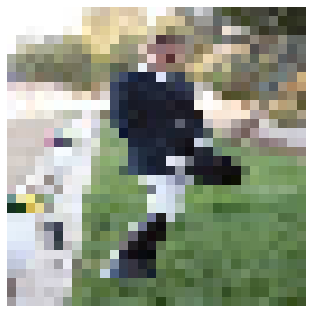

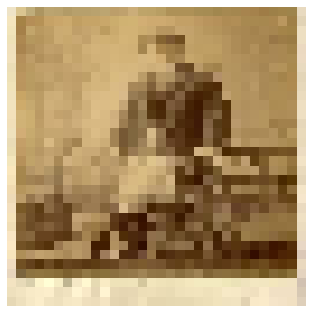

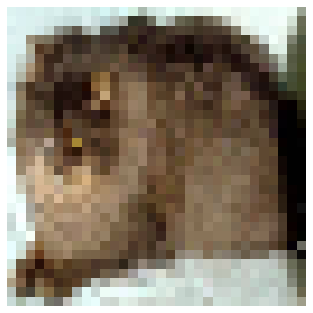

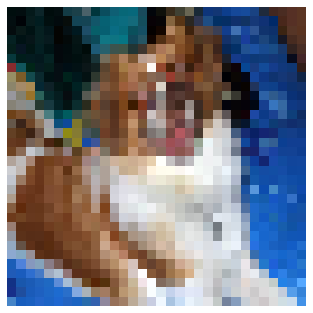

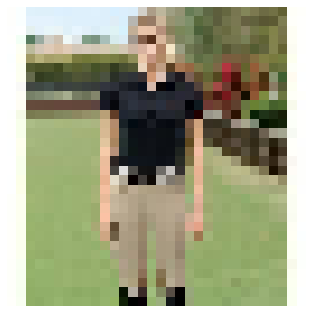

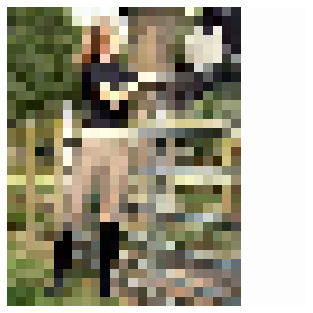

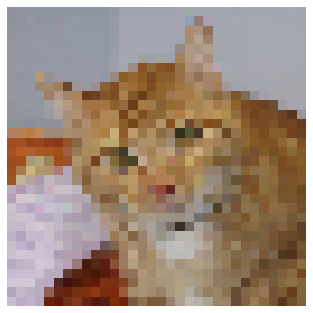

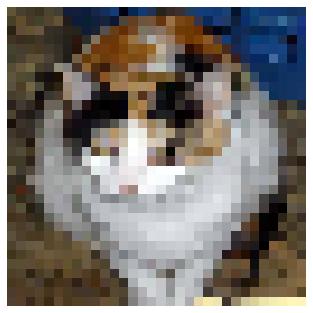

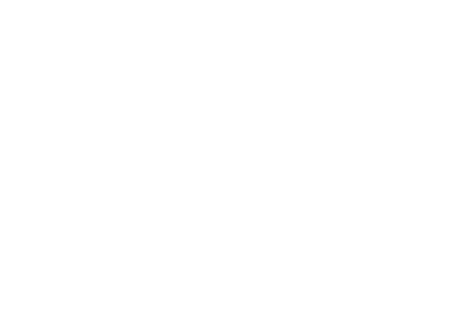

In [171]:
# memvisualisasikan data ini
def drawing(img):
    plt.imshow(img)
    plt.show()
    plt.axis("off")
    return 

for i in range(10):
    drawing(image_data[i])
    
"""Gambar buram karena kami menghapus beberapa fitur dari gambar untuk sekadar meningkatkan perhitungan kami"""

In [172]:
# itu adalah kode algoritma SVM dari awal
# kita cukup mengimpor ini dari scikit
class SVM:
    """kelas SVM, Author : Prateek Narang"""
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=50,learning_rate=0.001,maxItr=500):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        # Init parameter model
        W = np.zeros((1,no_of_features))
        bias = 0
        
        # Kerugian Awal
        
        # Pelatihan dari sini...
        # Aturan pembaruan Berat dan Bias yang kami bahas!
        losses = []
        
        for i in range(maxItr):
            # Pelatihan Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            # Turunan Gradien Batch (Kertas) dengan shuffling acak 
            for batch_start in range(0,no_of_samples,batch_size):
                # Asumsikan 0 gradien untuk batch
                gradw = 0
                gradb = 0
                
                # Ulang semua contoh pada mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                # Gradien untuk batch sudah siap! Perbarui W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses

### kita perlu mengonversi data untuk One-for-One classification

In [173]:
m = image_data.shape[0]  # jumlah sampel(gambar)
image_data = image_data.reshape(m,-1)
print(image_data.shape)  # kami hanya memiliki 3072 fitur karena kami mengurangi fitur -->(target_size = (32,32)) 
print(labels.shape)

(808, 3072)
(808,)


In [174]:
classes = len(np.unique(labels)) # jumlah label unik --> (manusia, kucing, kuda, anjing)
print(classes)

4


In [175]:
def class_wise_data(x,y):
    data = {}

    for i in range(classes):
        data[i] = []

    for j in range(x.shape[0]):
        data[y[j]].append(x[j])

    for k in data.keys():
        data[k] = np.array(data[k]) # mengonversi semua tombol ke array numpy

    return data


In [176]:
data = class_wise_data(image_data,labels)

In [177]:
print(data[0].shape[0])  # kucing
print(data[1].shape[0])  # anjing
print(data[2].shape[0])  # manusia
print(data[3].shape[0])  # kuda

202
202
202
202


In [178]:
def get_data_pair_for_svm(d1,d2):
    # Menggabungkan Data dari dua kelas menjadi matriks tunggal
    l1,l2 = d1.shape[0],d2.shape[0]
    
    samples = l1+l2   # total jumlah sampel
    features = d1.shape[1]  # total jumlah fitur
    
    data_pair = np.zeros((samples,features))
    data_labels = np.zeros((samples,))
    
    data_pair[:l1,:] = d1
    data_pair[l1:,:] = d2
    
    data_labels[:l1] = -1
    data_labels[l1:] = +1
    
    return data_pair,data_labels

### Training NC2 SVM's Part!

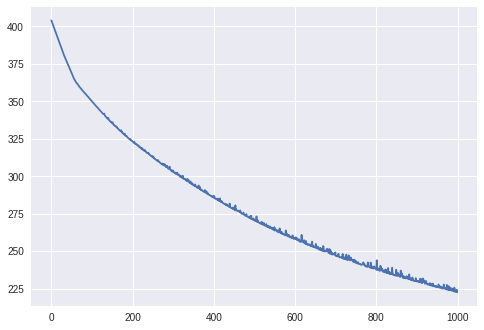

In [179]:
mySVM  = SVM()
xp, yp  = get_data_pair_for_svm(data[0],data[1])
w,b,loss  = mySVM.fit(xp,yp,learning_rate=0.00001,maxItr=1000)
# cetak(loss)
plt.plot(loss)
plt.show()
plt.style.use('seaborn')

In [180]:
def train_svm(x,y):
    # wts,b --> berat dan bias
    svm_classifiers = {}
    for i in range(classes):
        svm_classifiers[i] = {}
        for j in range(i+1,classes):
            xpair,ypair = get_data_pair_for_svm(data[i],data[j])
            wts,b,loss = mySVM.fit(xpair,ypair,learning_rate = 0.00001,maxItr = 1000) # metode call .fit dari kelas SVM
            svm_classifiers[i][j] = (wts,b)
            
            plt.plot(loss)
            plt.show()
            
    return svm_classifiers

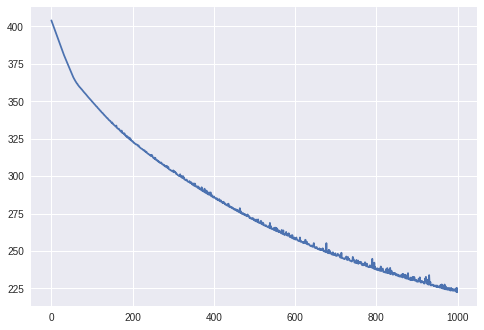

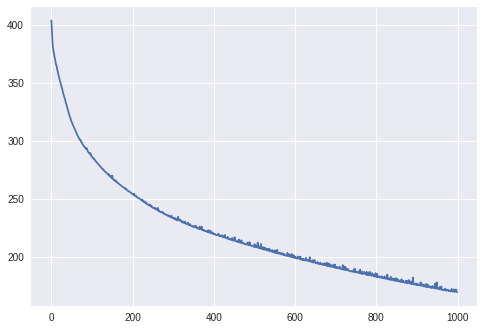

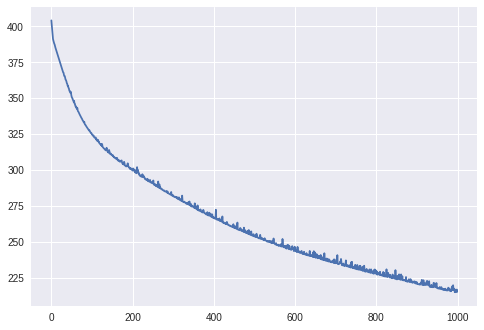

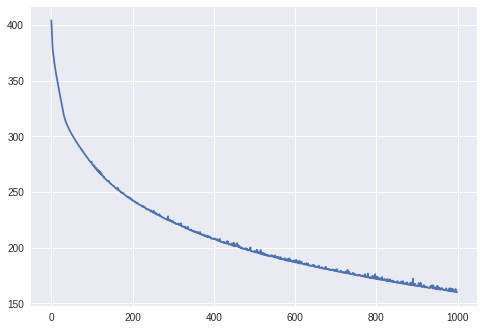

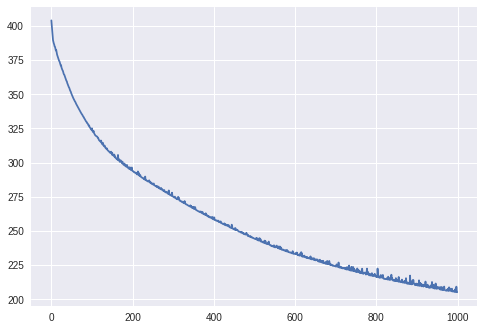

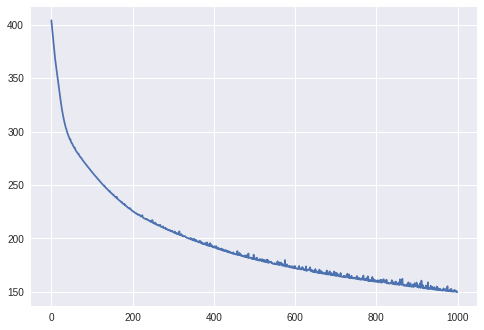

In [181]:
svm_classifiers = train_svm(image_data,labels)

In [182]:
# parameter untuk kucing dan anjing
cats_dogs = svm_classifiers[0][1]
cats_humans = svm_classifiers[0][3]
print(cats_dogs[0].shape) # Ini adalah bobot
print(cats_dogs[1])  # itu adalah istilah bias

(1, 3072)
-0.0275300000000001


## Prediction

In [183]:
def binary_prediction(x,w,b): 
    z = np.dot(x,w.T) + b
    if z>=0:
        return 1
    else:
        return -1
        

In [184]:
def predict(x):
    
    count = np.zeros((classes,))
    
    for i in range(classes):
        for j in range(i+1,classes):
            w,b = svm_classifiers[i][j]
            
            # mengambil prediksi mayoritas
            z = binary_prediction(x,w,b)
            
            if(z==1):
                count[j] +=1
            else:
                count[i] +=1
                
    final_prediction = np.argmax(count)
    return final_prediction

In [185]:
print(predict(image_data[0]))
print(labels[0])

1
1


In [186]:
def accuracy(x,y):
    
    count = 0
    
    for i in range(x.shape[0]):
        prediction = predict(x[i])
        
        if(prediction == y[i]):
            count +=1
            
    return count/x.shape[0]

In [187]:
accuracy(image_data,labels)  # ini adalah akurasi yang cukup baik hampir 60%

0.6064356435643564

### SVM menggunakan SK-learn

In [188]:
from sklearn import svm

In [189]:
svm_classifier = svm.SVC(kernel = 'linear',C = 1.0)

In [190]:
svm_classifier.fit(image_data,labels)
svm_classifier.score(image_data,labels)

0.6670792079207921

dalam perbandingan akurasi sklearn algoritma kami bekerja cukup baik

Sumber : https://github.com/Abheeshth/Project--Image_Classification_using_SVM